In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [37]:
h = ['TSH Diff','T3-resin uptake %','triiodothyronine','Total Serum thyroxin','TSH','Class attribute']
df = pd.read_csv('data/new-thyroid.csv',header=None,names=h)

In [38]:
df.head()


,TSH Diff,T3-resin uptake %,triiodothyronine,Total Serum thyroxin,TSH,Class attribute
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [39]:
df.columns

Index(['TSH Diff', 'T3-resin uptake %', 'triiodothyronine',
       'Total Serum thyroxin', 'TSH', 'Class attribute'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TSH Diff              215 non-null    int64  
 1   T3-resin uptake %     215 non-null    float64
 2   triiodothyronine      215 non-null    float64
 3   Total Serum thyroxin  215 non-null    float64
 4   TSH                   215 non-null    float64
 5   Class attribute       215 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [41]:
df.describe()

,TSH Diff,T3-resin uptake %,triiodothyronine,Total Serum thyroxin,TSH,Class attribute
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,109.595349,9.804651,2.050233,2.880000,4.199070,1.441860
std,13.145447,4.697362,1.419486,6.118031,8.070519,0.726737
min,65.000000,0.500000,0.200000,0.100000,-0.700000,1.000000
25%,103.000000,7.100000,1.350000,1.000000,0.550000,1.000000
50%,110.000000,9.200000,1.700000,1.300000,2.000000,1.000000
75%,117.500000,11.300000,2.200000,1.700000,4.100000,2.000000
max,144.000000,25.300000,10.000000,56.400000,56.300000,3.000000


In [42]:
df.isnull().sum()

TSH Diff                0
T3-resin uptake %       0
triiodothyronine        0
Total Serum thyroxin    0
TSH                     0
Class attribute         0
dtype: int64

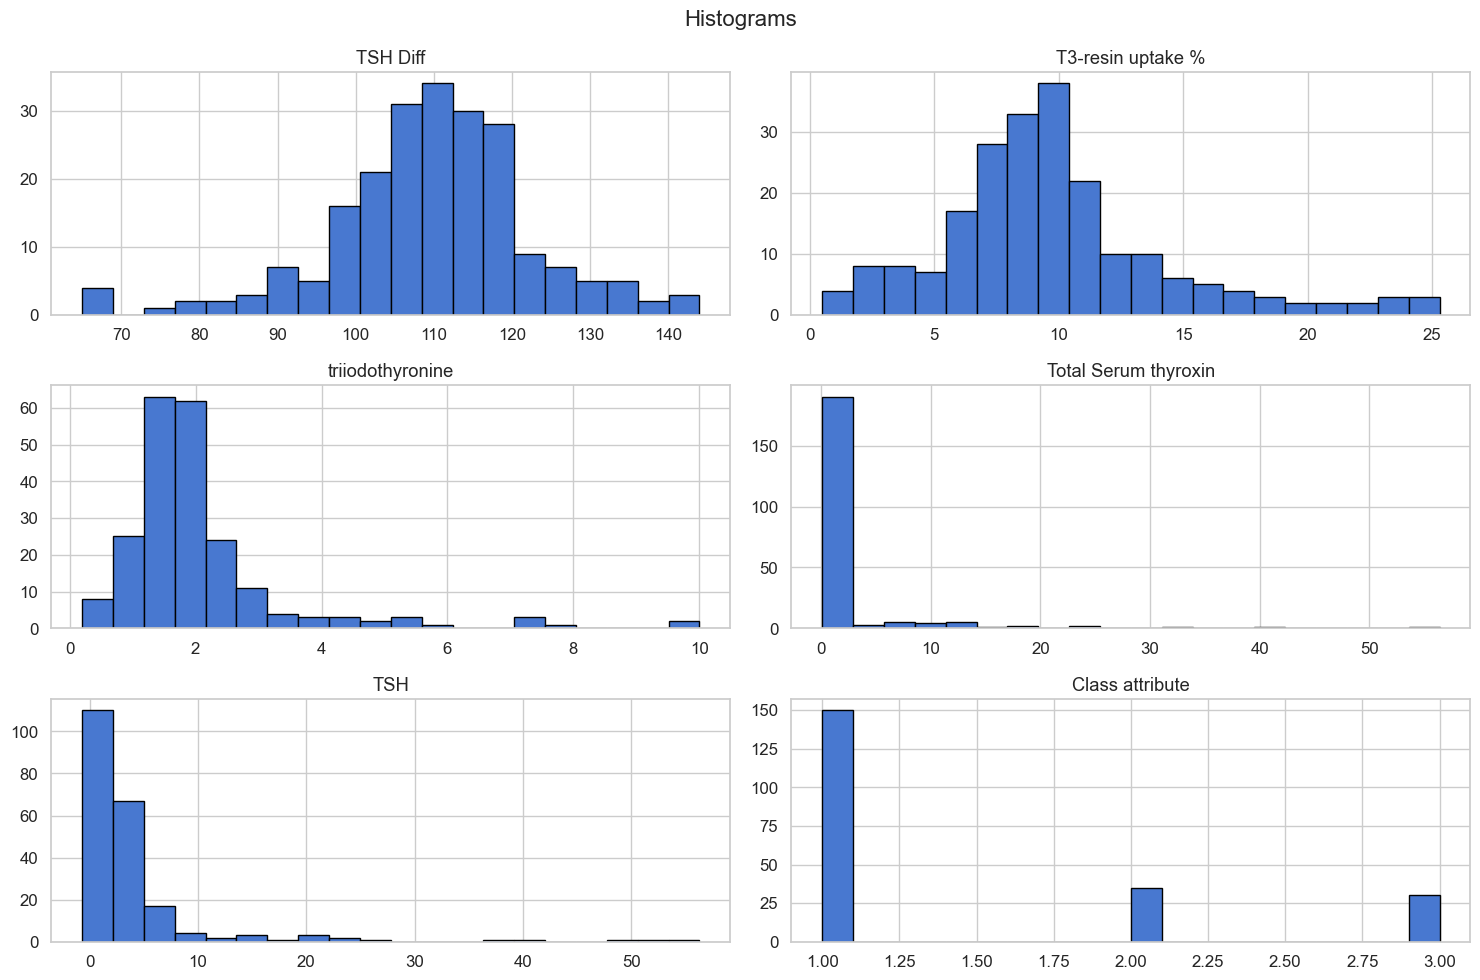

In [43]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Histograms for all features
df.hist(bins=20,figsize=(15,10), edgecolor='black')
plt.suptitle('Histograms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

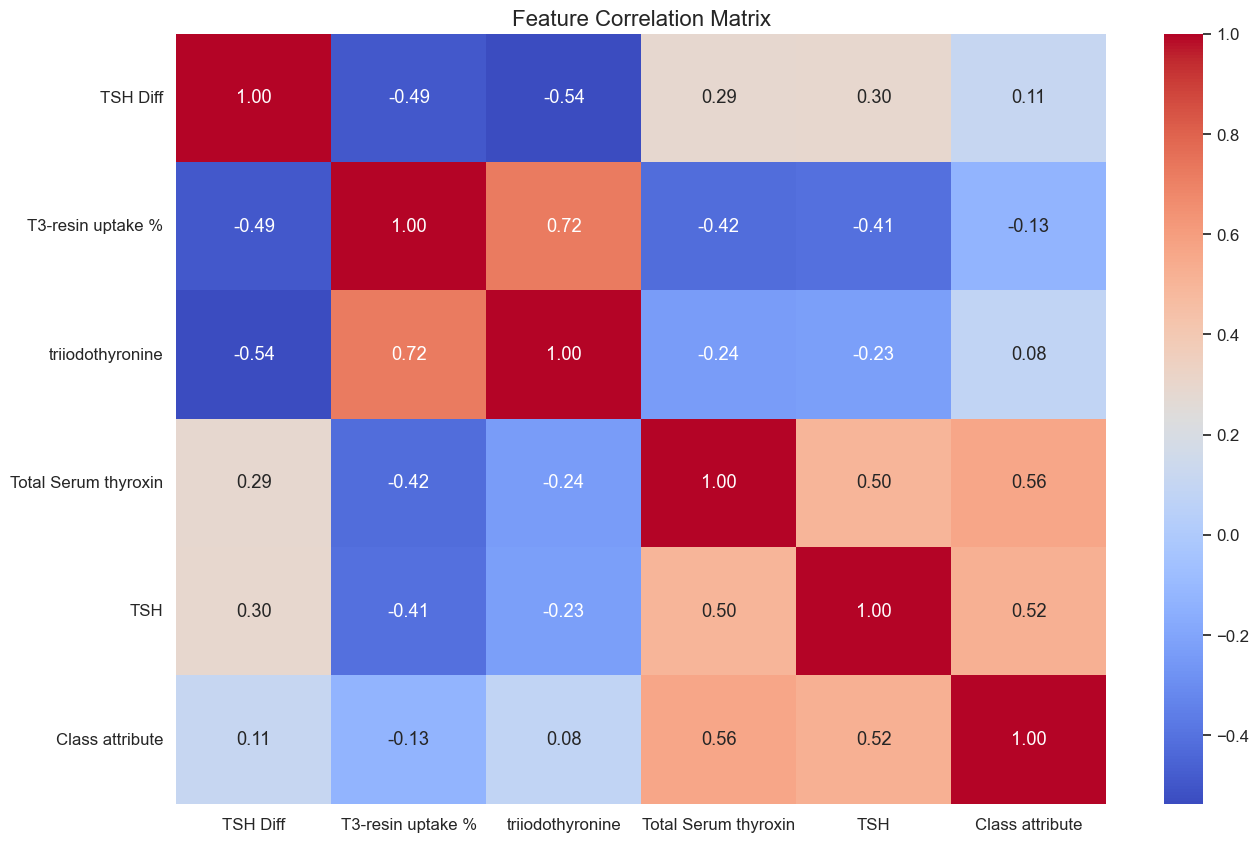

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

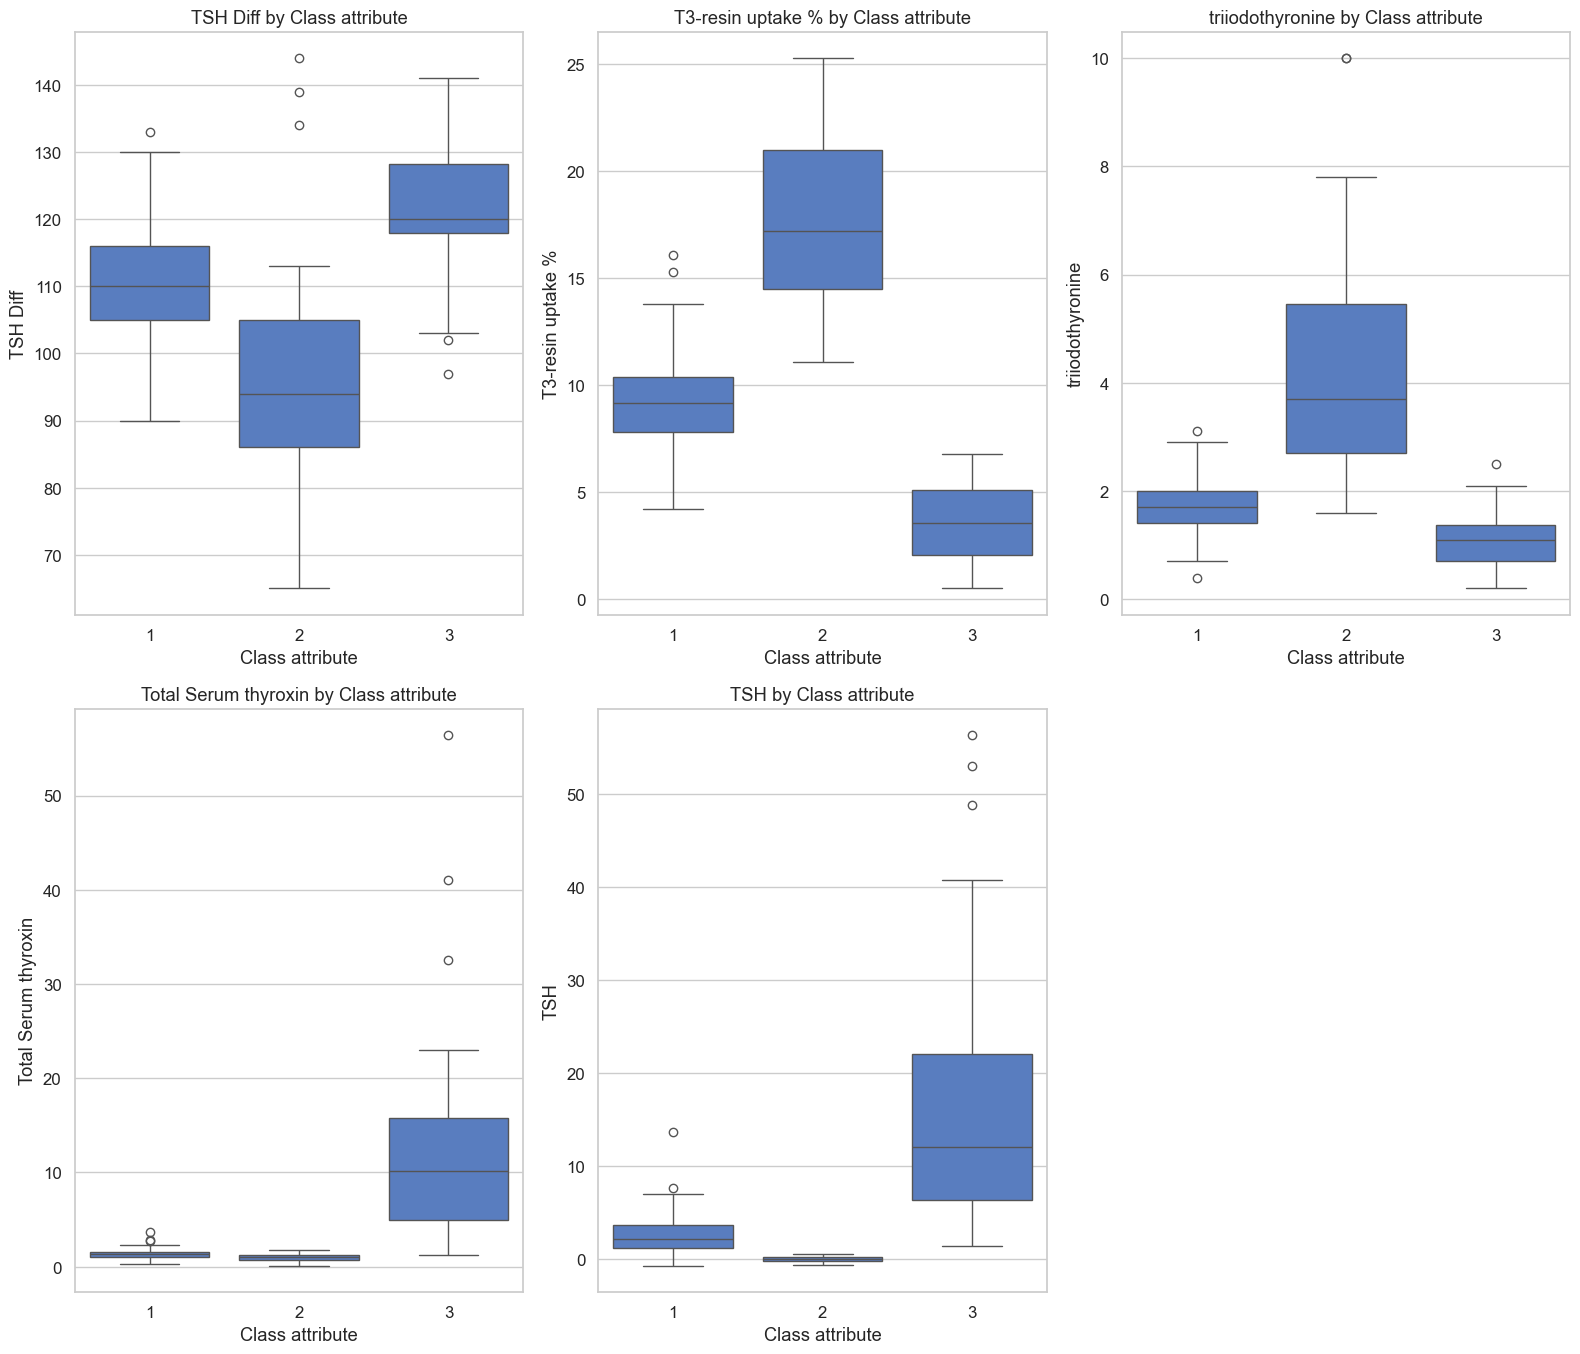

In [45]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Class attribute', y=col)
    plt.title(f'{col} by Class attribute')
plt.tight_layout(rect=[0, 0, 1, 2])
plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = df.drop('Class attribute', axis=1)
y = df['Class attribute']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (172, 5), Testing Set: (43, 5)


In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [48]:
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Model Accuracy:", accuracy)
# print("Accuracy Score:", (y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Model Accuracy: 1.0
Confusion Matrix:
 [[30  0  0]
 [ 0  7  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           1      1.000     1.000     1.000        30
           2      1.000     1.000     1.000         7
           3      1.000     1.000     1.000         6

    accuracy                          1.000        43
   macro avg      1.000     1.000     1.000        43
weighted avg      1.000     1.000     1.000        43



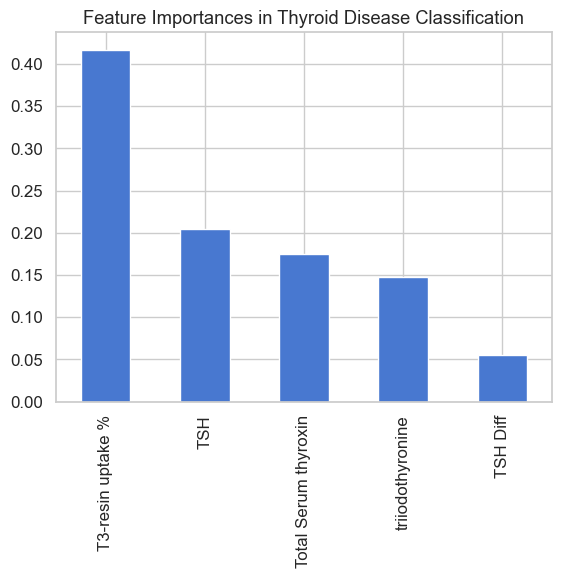

In [49]:
pipeline.feature_importances_ = pipeline.named_steps['classifier'].feature_importances_
feature_importances = pd.Series(pipeline.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances in Thyroid Disease Classification")
plt.show()